<a href="https://colab.research.google.com/github/Annie-Zhu1210/casa0018_workshop/blob/main/Week3/CASA0018_3_3_Cats_v_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training with a Larger Dataset - Cats and Dogs

> This lab is loosely based on one of the TensorFlow ‘Zero to Hero’ tutorials to create a model to recognize images of cats and dogs based on a previous Kaggle competition. There is a supporting video at: https://youtu.be/nq7_ZYJPWf0?t=141


Overfitting can be a problem when training on a small dataset. Overfitting means the network 'learns' the training dataset and therefore performs poorly when subjected to unseen data. In this lab you'll look at a real dataset and see the effects of overfitting and how to combat it. The training data set can be found in the following folder:

https://liveuclac-my.sharepoint.com/:f:/g/personal/ucfnmld_ucl_ac_uk/IgAhkP-D4Q_rRJKpJdJrmXK8AaSt67_3TvTCvAAEfjPO2yk


Download the zip file to your laptop. Then use the left hand panel of colab to upload the zip file to the 'tmp' directory - the upload may take a minute or two so be patient.

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

First perform some clean up from previous runs

In [2]:
!rm -r /tmp/cats-v-dogs
!rm -r /tmp/PetImages
!rm -f /tmp/model.keras

rm: cannot remove '/tmp/cats-v-dogs': No such file or directory
rm: cannot remove '/tmp/PetImages': No such file or directory


In [4]:
from pathlib import Path
local_zip = '/tmp/cats-and-dogs.zip'
zip_file = Path(local_zip)
if zip_file.is_file():
  zip_ref   = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()


In [5]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 5200
# 5200

5200
5200


In [6]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .8
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


In [8]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 4160
# 4160
# 1040
# 1040

4160
4160
1040
1040


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,207,457 (4.61 MB)

 Trainable params: 1,207,457 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='binary',
                                                              batch_size=32,
                                                              target_size=(150, 150))

# Expected Output:
# Found 8320 images belonging to 2 classes.
# Found 2080 images belonging to 2 classes.

Found 8320 images belonging to 2 classes.
Found 2080 images belonging to 2 classes.


In [11]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


260/260 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - acc: 0.5832 - loss: 0.6631 - val_acc: 0.7000 - val_loss: 0.5921
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - acc: 0.7340 - loss: 0.5253 - val_acc: 0.7615 - val_loss: 0.4859
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - acc: 0.7840 - loss: 0.4427 - val_acc: 0.7990 - val_loss: 0.4454
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - acc: 0.8256 - loss: 0.3870 - val_acc: 0.8067 - val_loss: 0.4226
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - acc: 0.8633 - loss: 0.3140 - val_acc: 0.8197 - val_loss: 0.4175
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - acc: 0.8915 - loss: 0.2570 - val_acc: 0.8154 - val_loss: 0.4059
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - acc: 0.9136 - loss: 0.2062 - val_acc: 0.8038 - val_loss: 0.4650
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - acc: 0.9459 - loss: 0.1482 - val_acc: 0.8082 - val_loss: 0.4987
Epoch 9/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/st

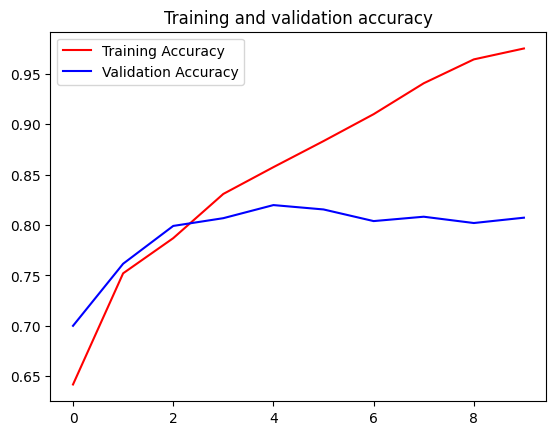

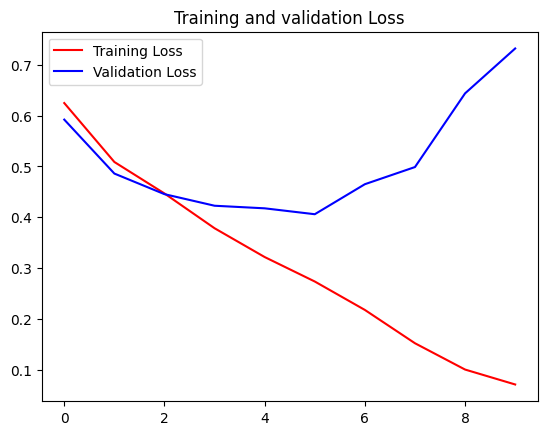

<Figure size 640x480 with 0 Axes>

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

If you inspect the Accuracy and Loss curves you will probably notice evidence of *overfitting* (where the network learns the training data set). You will notice that the training accuracy is too high and significantly better than the validation accuracy. And if you look at the loss curves the validation loss maybe increasing as the training progresses.

Use the following code to test out the model on a few images of cats and dogs that you have downloaded from the internet.


In [13]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 截屏2026-01-28 12.18.01.png to 截屏2026-01-28 12.18.01.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[0.]
[[0.]]
截屏2026-01-28 12.18.01.png is a cat


You may well find the model performs poorly at classifying images that it has not seen before - in other words it does not 'generalise' well, which is a classic sympton of model overfit.

To combat this overfitting we can adopt a number of measures, particularly data augmentation (to diversify the training data set) and regularisation (randomly dropping some connections for each training iteration). This should reduce the overfitting and increase the ability of the network to generalise (accurately classify unseen data).

The code below illustrates a modified model architecture that should be more resistant to overfitting.

In [15]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

Now we will add some data augmentation

In [16]:
train_datagen_2 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator_2 = train_datagen_2.flow_from_directory(TRAINING_DIR, class_mode='binary', batch_size=32, target_size=(150, 150))


validation_datagen_2 = ImageDataGenerator(rescale=1.0/255.)
validation_generator_2 = validation_datagen.flow_from_directory(VALIDATION_DIR, class_mode='binary', batch_size=32, target_size=(150, 150))

Found 8320 images belonging to 2 classes.
Found 2080 images belonging to 2 classes.


Now train the new model. This may take a long time if you do not get allocated a GPU. Instead you can skip a [few steps](#scrollTo=45MhQH21bsBT&line=4&uniqifier=1) and use a model I trained earlier

In [17]:
history_2 = model_2.fit(train_generator_2, epochs=50, validation_data=validation_generator_2)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 64s 217ms/step - acc: 0.5209 - loss: 1.8361 - val_acc: 0.6106 - val_loss: 0.6756
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 56s 217ms/step - acc: 0.5776 - loss: 0.6710 - val_acc: 0.6639 - val_loss: 0.6058
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - acc: 0.6664 - loss: 0.6159 - val_acc: 0.7250 - val_loss: 0.5831
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 55s 212ms/step - acc: 0.6945 - loss: 0.5818 - val_acc: 0.7514 - val_loss: 0.5090
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - acc: 0.7286 - loss: 0.5466 - val_acc: 0.7841 - val_loss: 0.4777
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 55s 212ms/step - acc: 0.7391 - loss: 0.5192 - val_acc: 0.7688 - val_loss: 0.4724
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 56s 216ms/step - acc: 0.7627 - loss: 0.4949 - val_acc: 0.8130 - val_loss: 0.4401
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 56s 216ms/step - acc: 0.7752 - loss: 0.4745 - val_acc: 0.7683 - val_loss: 0.4857
Epoch 9/50
260/260 ━━━━━━━━━━━━━

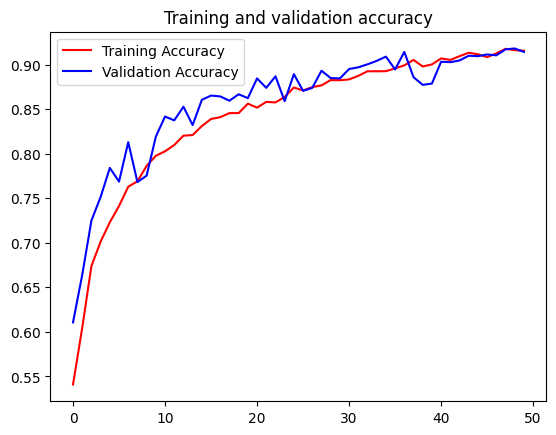

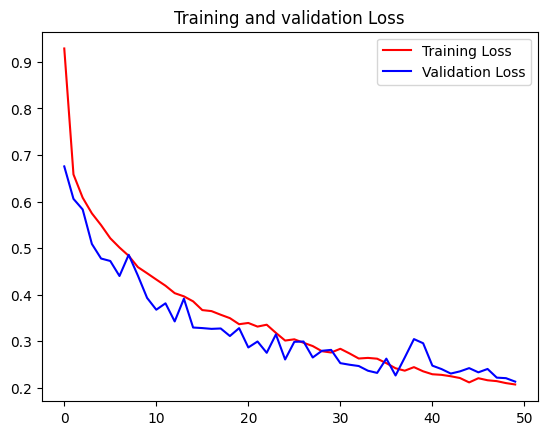

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
%matplotlib inline
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_2.history['acc']
val_acc=history_2.history['val_acc']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()
plt.savefig('foo.png')


In [20]:
model_2.save("/tmp/model.keras")

If you haven't got time to train the model, then you can upload a model I trained earlier using a GPU. This can be found at:

https://liveuclac-my.sharepoint.com/:f:/g/personal/ucfnmld_ucl_ac_uk/IgAhkP-D4Q_rRJKpJdJrmXK8AaSt67_3TvTCvAAEfjPO2yk


Upload the model to the 'tmp' folder as before.

In [21]:
model_2 = tf.keras.models.load_model('/tmp/model_2.keras', compile=False)

In [24]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_2.predict(images, batch_size=10)
  print(classes[0])
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 截屏2026-01-28 13.09.52.png to 截屏2026-01-28 13.09.52.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.]
[[0.]]
截屏2026-01-28 13.09.52.png is a cat
